In [1]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '83274eb2-bf95-460f-8db1-6f15aac1d0c1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-09-29T14:19:23.441Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 9455}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9756, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9756,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.916391e+07,1.916391e+07,NaN,1,NaN,NaN,None,2022-09-29T14:17:00.000Z,18932.666983,4.380836e+10,-24.1793,-1.781081,-0.851032,-0.515214,-6.066687,-20.124911,-2.322089,3.628239e+11,39.3370,3.975860e+11,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952
1,1027,Ethereum,ETH,ethereum,6115,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.225781e+08,1.225781e+08,NaN,2,NaN,NaN,None,2022-09-29T14:17:00.000Z,1293.193385,1.440049e+10,-29.4068,-2.335830,-1.218731,0.945011,-16.900414,-24.217787,22.461247,1.585172e+11,17.1814,1.585172e+11,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952
2,825,Tether,USDT,tether,40320,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.795621e+10,7.015545e+10,NaN,3,NaN,NaN,None,2022-09-29T14:17:00.000Z,1.000042,5.464954e+10,-24.2879,-0.003653,0.005964,-0.003785,-0.003244,-0.020317,0.111013,6.795904e+10,7.3665,7.015838e+10,None,2022-09-29T14:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-29 14:19:28.968952
3,3408,USD Coin,USDC,usd-coin,6397,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.866956e+10,4.866956e+10,NaN,4,NaN,NaN,None,2022-09-29T14:17:00.000Z,0.999832,4.021720e+09,-19.0110,-0.029743,-0.033692,-0.025043,-0.013027,-0.009853,-0.034111,4.866139e+10,5.2747,4.866139e+10,None,2022-09-29T14:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-29 14:19:28.968952
4,1839,BNB,BNB,bnb,1118,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-29T14:17:00.000Z,277.891272,8.493792e+08,-2.7378,-0.747718,1.453302,3.270496,-2.797531,-4.517196,28.279319,4.483422e+10,4.8609,5.557825e+10,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952
5,52,XRP,XRP,xrp,825,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.990067e+10,9.998929e+10,NaN,6,NaN,NaN,None,2022-09-29T14:17:00.000Z,0.429488,2.035908e+09,-29.2633,-1.494820,0.003563,-3.791249,30.714095,10.609811,36.783441,2.143175e+10,2.3231,4.294883e+10,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952
6,4687,Binance USD,BUSD,binance-usd,5197,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.104223e+10,2.104223e+10,NaN,7,NaN,NaN,None,2022-09-29T14:17:00.000Z,0.999170,7.512439e+09,-26.7786,-0.111041,-0.220165,-0.071477,-0.138818,-0.185613,-0.179050,2.102476e+10,2.2790,2.102476e+10,None,2022-09-29T14:17:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-29 14:19:28.968952
7,2010,Cardano,ADA,cardano,575,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.424007e+10,3.496950e+10,NaN,8,NaN,NaN,None,2022-09-29T14:17:00.000Z,0.428717,5.350501e+08,-21.1073,-1.064694,-0.903185,-5.389024,-4.763226,-18.949787,-4.230906,1.467930e+10,1.5912,1.929227e+10,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952
8,5426,Solana,SOL,solana,388,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.549137e+08,5.116169e+08,

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '83274eb2-bf95-460f-8db1-6f15aac1d0c1',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

    # Alternatively Create a CSV file and append the data to that
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\aerei\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\aerei\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\aerei\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Read in the file: df = pd.read_csv(r'C:\Users\aerei\OneDrive\Documents\Python Scripts\API.csv')
 

In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleeps for 1 minute
exit()

C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


C:\Users\aerei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aerei\AppData\Local\Temp\ipykernel_30448\2066227214.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


KeyboardInterrupt: 

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9756,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.916391e+07,1.916391e+07,NaN,1,NaN,NaN,None,2022-09-29T14:17:00.000Z,18932.666983,4.380836e+10,-24.1793,-1.781081,-0.851032,-0.515214,-6.066687,-20.124911,-2.322089,3.628239e+11,39.3370,3.975860e+11,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952,NaT
1,1027,Ethereum,ETH,ethereum,6115,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.225781e+08,1.225781e+08,NaN,2,NaN,NaN,None,2022-09-29T14:17:00.000Z,1293.193385,1.440049e+10,-29.4068,-2.335830,-1.218731,0.945011,-16.900414,-24.217787,22.461247,1.585172e+11,17.1814,1.585172e+11,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952,NaT
2,825,Tether,USDT,tether,40320,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.795621e+10,7.015545e+10,NaN,3,NaN,NaN,None,2022-09-29T14:17:00.000Z,1.000042,5.464954e+10,-24.2879,-0.003653,0.005964,-0.003785,-0.003244,-0.020317,0.111013,6.795904e+10,7.3665,7.015838e+10,None,2022-09-29T14:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-29 14:19:28.968952,NaT
3,3408,USD Coin,USDC,usd-coin,6397,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.866956e+10,4.866956e+10,NaN,4,NaN,NaN,None,2022-09-29T14:17:00.000Z,0.999832,4.021720e+09,-19.0110,-0.029743,-0.033692,-0.025043,-0.013027,-0.009853,-0.034111,4.866139e+10,5.2747,4.866139e+10,None,2022-09-29T14:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-29 14:19:28.968952,NaT
4,1839,BNB,BNB,bnb,1118,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-29T14:17:00.000Z,277.891272,8.493792e+08,-2.7378,-0.747718,1.453302,3.270496,-2.797531,-4.517196,28.279319,4.483422e+10,4.8609,5.557825e+10,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952,NaT
5,52,XRP,XRP,xrp,825,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.990067e+10,9.998929e+10,NaN,6,NaN,NaN,None,2022-09-29T14:17:00.000Z,0.429488,2.035908e+09,-29.2633,-1.494820,0.003563,-3.791249,30.714095,10.609811,36.783441,2.143175e+10,2.3231,4.294883e+10,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952,NaT
6,4687,Binance USD,BUSD,binance-usd,5197,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.104223e+10,2.104223e+10,NaN,7,NaN,NaN,None,2022-09-29T14:17:00.000Z,0.999170,7.512439e+09,-26.7786,-0.111041,-0.220165,-0.071477,-0.138818,-0.185613,-0.179050,2.102476e+10,2.2790,2.102476e+10,None,2022-09-29T14:17:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-29 14:19:28.968952,NaT
7,2010,Cardano,ADA,cardano,575,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.424007e+10,3.496950e+10,NaN,8,NaN,NaN,None,2022-09-29T14:17:00.000Z,0.428717,5.350501e+08,-21.1073,-1.064694,-0.903185,-5.389024,-4.763226,-18.949787,-4.230906,1.467930e+10,1.5912,1.929227e+10,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952,NaT
8,5426,Solana,SOL,solana,388,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-h

In [9]:
#Change the scientific notation to make it easier to read the numbers

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9756,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19163906.00000,19163906.00000,NaN,1,NaN,NaN,None,2022-09-29T14:17:00.000Z,18932.66698,43808357414.53848,-24.17930,-1.78108,-0.85103,-0.51521,-6.06669,-20.12491,-2.32209,362823850393.24799,39.33700,397586006644.90002,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952,NaT
1,1027,Ethereum,ETH,ethereum,6115,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122578091.49900,122578091.49900,NaN,2,NaN,NaN,None,2022-09-29T14:17:00.000Z,1293.19339,14400492069.79240,-29.40680,-2.33583,-1.21873,0.94501,-16.90041,-24.21779,22.46125,158517177104.48648,17.18140,158517177104.48999,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952,NaT
2,825,Tether,USDT,tether,40320,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,67956206762.89136,70155449906.22189,NaN,3,NaN,NaN,None,2022-09-29T14:17:00.000Z,1.00004,54649540505.34975,-24.28790,-0.00365,0.00596,-0.00379,-0.00324,-0.02032,0.11101,67959044702.30479,7.36650,70158379688.88000,None,2022-09-29T14:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-29 14:19:28.968952,NaT
3,3408,USD Coin,USDC,usd-coin,6397,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,48669555819.03951,48669555819.03951,NaN,4,NaN,NaN,None,2022-09-29T14:17:00.000Z,0.99983,4021720480.98696,-19.01100,-0.02974,-0.03369,-0.02504,-0.01303,-0.00985,-0.03411,48661394054.86627,5.27470,48661394054.87000,None,2022-09-29T14:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-29 14:19:28.968952,NaT
4,1839,BNB,BNB,bnb,1118,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-09-29T14:17:00.000Z,277.89127,849379193.03092,-2.73780,-0.74772,1.45330,3.27050,-2.79753,-4.51720,28.27932,44834216756.28722,4.86090,55578254463.21000,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952,NaT
5,52,XRP,XRP,xrp,825,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49900666456.00000,99989286233.00000,NaN,6,NaN,NaN,None,2022-09-29T14:17:00.000Z,0.42949,2035907952.28876,-29.26330,-1.49482,0.00356,-3.79125,30.71409,10.60981,36.78344,21431752414.06875,2.32310,42948830018.06000,None,2022-09-29T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-29 14:19:28.968952,NaT
6,4687,Binance USD,BUSD,binance-usd,5197,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21042229623.12000,21042229623.12000,NaN,7,NaN,NaN,None,2022-09-29T14:17:00.000Z,0.99917,7512439034.51459,-26.77860,-0.11104,-0.22017,-0.07148,-0.13882,-0.18561,-0.17905,21024761165.21528,2.27900,21024761165.22000,None,2022-09-29T14:17:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-09-29 14:19:28.968952,NaT
7,2010,Cardano,ADA,cardano,575,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34240074047.40000,34969499401.18100,NaN,8,NaN,NaN,None,2022-09-29T14:17:00.000Z,0.42872,535050081.44474,-21.10730,-1.06469,-0.90318,-5.38902,-4.76323,-18.94979,-4.23091,14679304900.00502,1.59120,19292269040.83000,None

In [11]:
# Looking at the coin trends over time

df_trends = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df_trends

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.70411,-1.06892,-0.27693,-5.64379,-20.15875,-1.99247
Ethereum,-2.24080,-1.40180,1.27839,-16.33417,-24.24192,23.10537
Tether,-0.00052,0.00567,-0.00244,-0.00021,-0.01990,0.10516
USD Coin,-0.00558,-0.01649,-0.00881,0.00156,0.00500,-0.00755
BNB,-0.62812,1.53705,3.63302,-2.14467,-4.56705,29.57863
XRP,-1.57670,-0.43421,-3.62807,31.25550,10.09284,37.27436
Binance USD,-0.02985,-0.09199,-0.05656,-0.07418,-0.07121,-0.08033
Cardano,-0.98013,-0.97102,-4.91453,-4.22849,-19.00403,-3.74554
Solana,-1.86620,0.70509,2.94079,3.34389,-25.38941,1.95488


In [12]:
df_stacked = df_trends.stack()
df_stacked

name                                     
Bitcoin      quote.USD.percent_change_1h     -1.70411
             quote.USD.percent_change_24h    -1.06892
             quote.USD.percent_change_7d     -0.27693
             quote.USD.percent_change_30d    -5.64379
             quote.USD.percent_change_60d   -20.15875
             quote.USD.percent_change_90d    -1.99247
Ethereum     quote.USD.percent_change_1h     -2.24080
             quote.USD.percent_change_24h    -1.40180
             quote.USD.percent_change_7d      1.27839
             quote.USD.percent_change_30d   -16.33417
             quote.USD.percent_change_60d   -24.24192
             quote.USD.percent_change_90d    23.10537
Tether       quote.USD.percent_change_1h     -0.00052
             quote.USD.percent_change_24h     0.00567
             quote.USD.percent_change_7d     -0.00244
             quote.USD.percent_change_30d    -0.00021
             quote.USD.percent_change_60d    -0.01990
             quote.USD.percent_change_90

In [13]:
type(df_stacked)

pandas.core.series.Series

In [14]:
df_stacked2 = df_stacked.to_frame(name='values')
df_stacked2

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -1.70411
            quote.USD.percent_change_24h  -1.06892
            quote.USD.percent_change_7d   -0.27693
            quote.USD.percent_change_30d  -5.64379
            quote.USD.percent_change_60d -20.15875
            quote.USD.percent_change_90d  -1.99247
Ethereum    quote.USD.percent_change_1h   -2.24080
            quote.USD.percent_change_24h  -1.40180
            quote.USD.percent_change_7d    1.27839
            quote.USD.percent_change_30d -16.33417
            quote.USD.percent_change_60d -24.24192
            quote.USD.percent_change_90d  23.10537
Tether      quote.USD.percent_change_1h   -0.00052
            quote.USD.percent_change_24h   0.00567
            quote.USD.percent_change_7d   -0.00244
            quote.USD.percent_change_30d  -0.00021
            quote.USD.percent_change_60d  -0.01990
            quote.USD.percent_change_90d   0.10516
USD Coin    quote.USD.percent_change_1h   -0.00558
            quote.USD.percent_change_24h  -0.01649
            quote.USD.percent_change_7d   -0.00881
            quote.USD.percent_change_30d   0.00156
            quote.USD.percent_change_60d   0.00500
            quote.USD.percent_change_90d  -0.00755
BNB         quote.USD.percent_change_1h   -0.62812
            quote.USD.percent_change_24h   1.53705
            quote.USD.percent_change_7d    3.63302
            quote.USD.percent_change_30d  -2.14467
            quote.USD.percent_change_60d  -4.56705
            quote.USD.percent_change_90d  29.57863
XRP         quote.USD.percent_change_1h   -1.57670
            quote.USD.percent_change_24h  -0.43421
            quote.USD.percent_change_7d   -3.62807
            quote.USD.percent_change_30d  31.25550
            quote.USD.percent_change_60d  10.09284
            quote.USD.percent_change_90d  37.27436
Binance USD quote.USD.percent_change_1h   -0.02985
            quote.USD.percent_change_24h  -0.09199
            quote.USD.percent_change_7d   -0.05656
            quote.USD.percent_change_30d  -0.07418
            quote.USD.percent_change_60d  -0.07121
            quote.USD.percent_change_90d  -0.08033
Cardano     quote.USD.percent_change_1h   -0.98013
            quote.USD.percent_change_24h  -0.97102
            quote.USD.percent_change_7d   -4.91453
            quote.USD.percent_change_30d  -4.22849
            quote.USD.percent_change_60d -19.00403
            quote.USD.percent_change_90d  -3.74554
Solana      quote.USD.percent_change_1h   -1.86620
            quote.USD.percent_change_24h   0.70509
            quote.USD.percent_change_7d    2.94079
            quote.USD.percent_change_30d   3.34389
            quote.USD.percent_change_60d -25.38941
            quote.USD.percent_change_90d   1.95488
Dogecoin    quote.USD.percent_change_1h   -0.87999
            quote.USD.percent_change_24h  -1.25486
            quote.USD.percent_change_7d    1.02261
            quote.USD.percent_change_30d  -5.15360
            quote.USD.percent_change_60d -15.34940
            quote.USD.percent_change_90d  -8.87553
Polkadot    quote.USD.percent_change_1h   -1.57767
            quote.USD.percent_change_24h  -1.02548
            quote.USD.percent_change_7d   -1.41803
            quote.USD.percent_change_30d -11.27904
            quote.USD.percent_change_60d -24.38986
            quote.USD.percent_change_90d  -6.15282
Dai         quote.USD.percent_change_1h   -0.05274
            quote.USD.percent_change_24h  -0.07926
            quote.USD.percent_change_7d   -0.04187
            quote.USD.percent_change_30d   0.00449
            quote.USD.percent_change_60d  -0.01539
            quote.USD.percent_change_90d  -0.07672
Polygon     quote.USD.percent_change_1h   -0.94600
            quote.USD.percent_change_24h  -0.37655
            quote.USD.percent_change_7d   -0.60560
            quote.USD.percent_change_30d  -9.33484
            quote.USD.percent_change_60d -22.41681
            quo

In [15]:
df_stacked2.count()

values    90
dtype: int64

In [21]:
index = pd.Index(range(90))

df_stacked3 = df_stacked2.reset_index()
df_stacked3

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.70411
1,Bitcoin,quote.USD.percent_change_24h,-1.06892
2,Bitcoin,quote.USD.percent_change_7d,-0.27693
3,Bitcoin,quote.USD.percent_change_30d,-5.64379
4,Bitcoin,quote.USD.percent_change_60d,-20.15875
5,Bitcoin,quote.USD.percent_change_90d,-1.99247
6,Ethereum,quote.USD.percent_change_1h,-2.24080
7,Ethereum,quote.USD.percent_change_24h,-1.40180
8,Ethereum,quote.USD.percent_change_7d,1.27839
9,Ethereum,quote.USD.percent_change_30d,-16.33417


In [22]:
df_stacked4 = df_stacked3.rename(columns={'level_1': 'percent_change'})
df_stacked4

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.70411
1,Bitcoin,quote.USD.percent_change_24h,-1.06892
2,Bitcoin,quote.USD.percent_change_7d,-0.27693
3,Bitcoin,quote.USD.percent_change_30d,-5.64379
4,Bitcoin,quote.USD.percent_change_60d,-20.15875
5,Bitcoin,quote.USD.percent_change_90d,-1.99247
6,Ethereum,quote.USD.percent_change_1h,-2.24080
7,Ethereum,quote.USD.percent_change_24h,-1.40180
8,Ethereum,quote.USD.percent_change_7d,1.27839
9,Ethereum,quote.USD.percent_change_30d,-16.33417


In [24]:
df_stacked4['percent_change'] = df_stacked4['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24h','7d','30d','60d','90d'])
df_stacked4

,name,percent_change,values
0,Bitcoin,1hr,-1.70411
1,Bitcoin,24h,-1.06892
2,Bitcoin,7d,-0.27693
3,Bitcoin,30d,-5.64379
4,Bitcoin,60d,-20.15875
5,Bitcoin,90d,-1.99247
6,Ethereum,1hr,-2.24080
7,Ethereum,24h,-1.40180
8,Ethereum,7d,1.27839
9,Ethereum,30d,-16.33417


In [25]:
import seaborn as sns
import matplotlib as plt

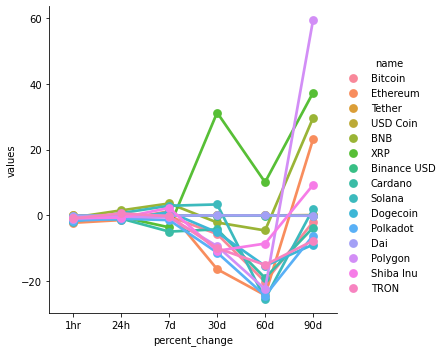

In [26]:
sns.catplot(x='percent_change', y='values', hue='name', data=df_stacked4, kind='point')